In [1]:
# import useful libraries
import pandas as pd
import numpy as np
import scipy
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Data Overview and 2 main scenarios

In [2]:
import pandas as pd
path = 'loan.csv'
df=pd.read_csv(path)
df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=111)

In [3]:
df.head(2)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [4]:
df.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,...,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,...,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,...,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,...,NaN,NaN,NaN,NaN,2.000000,0.0,NaN,NaN,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [6]:
#  I focus into 2 scenarios: Fully paid and Charged-off
df['loan_status'].value_counts()

Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64

In [7]:
df =df[(df['loan_status']!='Current')]

# Data cleaning

## Drop columns

In [8]:
# check nullratio
r_null = 100*(df.isnull().sum()/len((df)))
null_colummns = r_null[r_null > 0].sort_values(ascending = False)
print(f'number of columns with null values per total columns: {len(null_colummns)}/{len(df.columns)}')


number of columns with null values per total columns: 68/111


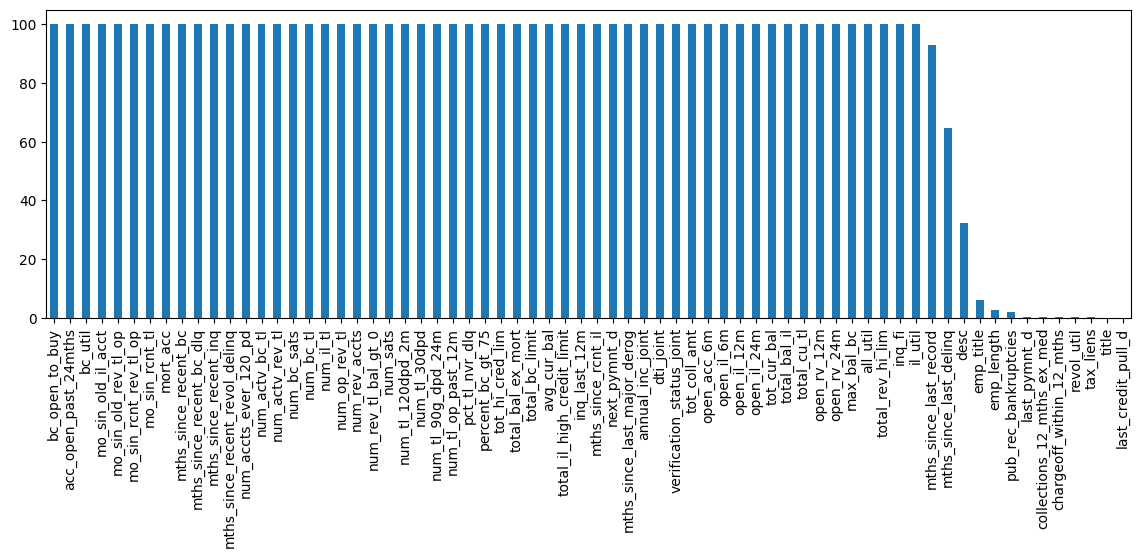

In [9]:
null_colummns.plot(kind='bar',figsize=(14,4))
plt.show()

In [10]:
null_colummns_90 = r_null[r_null > 90].sort_values(ascending = False)
print('number of columns with 90% null values:',len(null_colummns))
null_colummns_90

number of columns with 90% null values: 68


mo_sin_old_rev_tl_op              100.000000
next_pymnt_d                      100.000000
mo_sin_rcnt_tl                    100.000000
mort_acc                          100.000000
mths_since_recent_bc              100.000000
mths_since_recent_bc_dlq          100.000000
mths_since_recent_inq             100.000000
mths_since_recent_revol_delinq    100.000000
num_accts_ever_120_pd             100.000000
num_actv_bc_tl                    100.000000
num_actv_rev_tl                   100.000000
num_bc_sats                       100.000000
num_bc_tl                         100.000000
num_il_tl                         100.000000
num_op_rev_tl                     100.000000
num_rev_accts                     100.000000
num_rev_tl_bal_gt_0               100.000000
num_sats                          100.000000
num_tl_120dpd_2m                  100.000000
num_tl_30dpd                      100.000000
num_tl_90g_dpd_24m                100.000000
num_tl_op_past_12m                100.000000
pct_tl_nvr

In [11]:
df = df.drop(columns=null_colummns_90.index.to_list())
df

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
5,1075269,1311441,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,...,161.03,Jan-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,...,80.90,Jun-10,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,...,281.94,Jul-10,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,...,0.00,Jun-07,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,...,0.00,Jun-07,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN


In [12]:
## drop columns with only one values
columns  = df.columns.to_list()
columns_vales_count = {c : len(df[c].value_counts().index.to_list()) for c in columns}
# for c in columns:
#     values = df[c].value_counts().index.to_list()
#     if len(values)<2:
#         one_values_columns
columns_vales_count

{'id': 38577,
 'member_id': 38577,
 'loan_amnt': 870,
 'funded_amnt': 1019,
 'funded_amnt_inv': 8050,
 'term': 2,
 'int_rate': 370,
 'installment': 15022,
 'grade': 7,
 'sub_grade': 35,
 'emp_title': 28027,
 'emp_length': 11,
 'home_ownership': 5,
 'annual_inc': 5215,
 'verification_status': 3,
 'issue_d': 55,
 'loan_status': 2,
 'pymnt_plan': 1,
 'url': 38577,
 'desc': 25803,
 'purpose': 14,
 'title': 19297,
 'zip_code': 822,
 'addr_state': 50,
 'dti': 2853,
 'delinq_2yrs': 11,
 'earliest_cr_line': 524,
 'inq_last_6mths': 9,
 'mths_since_last_delinq': 95,
 'open_acc': 40,
 'pub_rec': 5,
 'revol_bal': 21275,
 'revol_util': 1088,
 'total_acc': 82,
 'initial_list_status': 1,
 'out_prncp': 1,
 'out_prncp_inv': 1,
 'total_pymnt': 36714,
 'total_pymnt_inv': 36387,
 'total_rec_prncp': 6841,
 'total_rec_int': 34025,
 'total_rec_late_fee': 1320,
 'recoveries': 4040,
 'collection_recovery_fee': 2616,
 'last_pymnt_d': 101,
 'last_pymnt_amnt': 34418,
 'last_credit_pull_d': 106,
 'collections_12_m

In [13]:
# columns has only 1  values
one_value_column = [c for c,v in columns_vales_count.items() if v <2 ]
one_value_column

['pymnt_plan',
 'initial_list_status',
 'out_prncp',
 'out_prncp_inv',
 'collections_12_mths_ex_med',
 'policy_code',
 'application_type',
 'acc_now_delinq',
 'chargeoff_within_12_mths',
 'delinq_amnt',
 'tax_liens']

In [14]:
df = df.drop(columns=one_value_column)
df

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0
5,1075269,1311441,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,...,5632.21,5000.00,632.21,0.00,0.00,0.00,Jan-15,161.03,Jan-16,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,...,1213.88,2500.00,322.97,0.00,0.00,0.00,Jul-10,80.90,Jun-10,NaN
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,...,1020.51,8500.00,1413.49,0.00,0.00,0.00,Jul-10,281.94,Jul-10,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,...,1397.12,5000.00,272.16,0.00,0.00,0.00,Apr-08,0.00,Jun-07,NaN
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,...,672.66,5000.00,174.20,0.00,0.00,0.00,Jan-08,0.00,Jun-07,NaN


In [15]:
df.columns.to_list()

['id',
 'member_id',
 'loan_amnt',
 'funded_amnt',
 'funded_amnt_inv',
 'term',
 'int_rate',
 'installment',
 'grade',
 'sub_grade',
 'emp_title',
 'emp_length',
 'home_ownership',
 'annual_inc',
 'verification_status',
 'issue_d',
 'loan_status',
 'url',
 'desc',
 'purpose',
 'title',
 'zip_code',
 'addr_state',
 'dti',
 'delinq_2yrs',
 'earliest_cr_line',
 'inq_last_6mths',
 'mths_since_last_delinq',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_d',
 'last_pymnt_amnt',
 'last_credit_pull_d',
 'pub_rec_bankruptcies']

In [16]:
# Drop unessecery columns:
# id columns
# columns with description meaning
# columns which cannot be used for calculation
unnessesary_columns = ['url','member_id','id','emp_title','desc', 'title','sub_grade',
    'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths',
    'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 
    'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 
    'total_rec_int', 'total_rec_late_fee', 'recoveries', 
    'collection_recovery_fee', 'last_pymnt_d', 
    'last_pymnt_amnt', 'last_credit_pull_d','zip_code', 'addr_state' ]

In [17]:
df = df.drop(columns=unnessesary_columns)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   loan_amnt               38577 non-null  int64  
 1   funded_amnt             38577 non-null  int64  
 2   funded_amnt_inv         38577 non-null  float64
 3   term                    38577 non-null  object 
 4   int_rate                38577 non-null  object 
 5   installment             38577 non-null  float64
 6   grade                   38577 non-null  object 
 7   emp_length              37544 non-null  object 
 8   home_ownership          38577 non-null  object 
 9   annual_inc              38577 non-null  float64
 10  verification_status     38577 non-null  object 
 11  issue_d                 38577 non-null  object 
 12  loan_status             38577 non-null  object 
 13  purpose                 38577 non-null  object 
 14  dti                     38577 non-null

##  Transform columns

In [18]:
df['term'].value_counts()

 36 months    29096
 60 months     9481
Name: term, dtype: int64

In [19]:
df['term'] = list(map(lambda x: int(x[:3]), df['term']))
df['term'].value_counts()


36    29096
60     9481
Name: term, dtype: int64

In [20]:
df['int_rate'].value_counts()

10.99%    913
11.49%    790
7.51%     787
13.49%    749
7.88%     725
         ... 
16.96%      1
18.36%      1
16.15%      1
16.01%      1
16.20%      1
Name: int_rate, Length: 370, dtype: int64

In [21]:
df['int_rate'] = df['int_rate'].apply(lambda x : float(x[:-1]))
df['int_rate'].value_counts()

10.99    913
11.49    790
7.51     787
13.49    749
7.88     725
        ... 
16.96      1
18.36      1
16.15      1
16.01      1
16.20      1
Name: int_rate, Length: 370, dtype: int64

In [22]:
df['emp_length'].value_counts()

10+ years    8488
< 1 year     4508
2 years      4291
3 years      4012
4 years      3342
5 years      3194
1 year       3169
6 years      2168
7 years      1711
8 years      1435
9 years      1226
Name: emp_length, dtype: int64

In [23]:
df['emp_length'] = df['emp_length'].replace({'< 1 year': 0, '2 years': 2, '3 years': 3, 
                                                         '7 years': 7, '4 years': 4, '5 years': 5, 
                                                         '1 year': 1, '6 years': 6, '8 years': 8, 
                                                         '9 years': 9,  '10+ years': 10})

df['emp_length'].value_counts()

10.0    8488
0.0     4508
2.0     4291
3.0     4012
4.0     3342
5.0     3194
1.0     3169
6.0     2168
7.0     1711
8.0     1435
9.0     1226
Name: emp_length, dtype: int64

In [24]:
df['issue_d'].value_counts()

Nov-11    2062
Dec-11    2042
Oct-11    1941
Sep-11    1913
Aug-11    1798
Jul-11    1745
Jun-11    1728
May-11    1609
Apr-11    1559
Mar-11    1442
Jan-11    1380
Feb-11    1297
Dec-10    1267
Oct-10    1132
Nov-10    1121
Jul-10    1119
Sep-10    1086
Aug-10    1078
Jun-10    1029
May-10     920
Apr-10     827
Mar-10     737
Feb-10     627
Nov-09     602
Dec-09     598
Jan-10     589
Oct-09     545
Sep-09     449
Aug-09     408
Jul-09     374
Jun-09     356
May-09     319
Apr-09     290
Mar-09     276
Feb-09     260
Jan-09     239
Mar-08     236
Dec-08     223
Nov-08     184
Feb-08     174
Jan-08     171
Apr-08     155
Oct-08      96
Dec-07      85
Jul-08      83
May-08      71
Aug-08      71
Jun-08      66
Oct-07      47
Nov-07      37
Aug-07      33
Sep-08      32
Jul-07      30
Sep-07      18
Jun-07       1
Name: issue_d, dtype: int64

In [25]:
df['issue_d'] = pd.to_datetime(df['issue_d'], format='%b-%y')
df['issue_y'] = pd.DatetimeIndex(df['issue_d']).year
df['issue_m'] = pd.DatetimeIndex(df['issue_d']).month
df= df.drop(columns='issue_d')

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   loan_amnt               38577 non-null  int64  
 1   funded_amnt             38577 non-null  int64  
 2   funded_amnt_inv         38577 non-null  float64
 3   term                    38577 non-null  int64  
 4   int_rate                38577 non-null  float64
 5   installment             38577 non-null  float64
 6   grade                   38577 non-null  object 
 7   emp_length              37544 non-null  float64
 8   home_ownership          38577 non-null  object 
 9   annual_inc              38577 non-null  float64
 10  verification_status     38577 non-null  object 
 11  loan_status             38577 non-null  object 
 12  purpose                 38577 non-null  object 
 13  dti                     38577 non-null  float64
 14  mths_since_last_delinq  13672 non-null